In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv')

In [4]:
train.iloc[:, 1:-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     20000 non-null  int64 
 1   Gender                  20000 non-null  object
 2   Education_Status        20000 non-null  object
 3   Employment_Status       20000 non-null  object
 4   Working_Week (Yearly)   20000 non-null  int64 
 5   Industry_Status         20000 non-null  object
 6   Occupation_Status       20000 non-null  object
 7   Race                    20000 non-null  object
 8   Hispanic_Origin         20000 non-null  object
 9   Martial_Status          20000 non-null  object
 10  Household_Status        20000 non-null  object
 11  Household_Summary       20000 non-null  object
 12  Citizenship             20000 non-null  object
 13  Birth_Country           20000 non-null  object
 14  Birth_Country (Father)  20000 non-null  object
 15  Bi

### 중복 컬럼 확인

### train 1680, test 680개 존재

In [5]:
len(train.iloc[:, 1:-1].drop_duplicates())

18320

In [6]:
dup = train[train.iloc[:, 1:-1].duplicated()]
dup

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
325,TRAIN_00325,2,F,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
329,TRAIN_00329,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,Black,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
360,TRAIN_00360,8,F,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
391,TRAIN_00391,7,F,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
417,TRAIN_00417,11,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19956,TRAIN_19956,6,F,Children,Children or Armed Forces,0,Not in universe or children,Unknown,Black,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
19961,TRAIN_19961,12,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
19968,TRAIN_19968,14,F,Children,Children or Armed Forces,0,Not in universe or children,Unknown,Black,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
19989,TRAIN_19989,14,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0


(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([2209. , 2788.1, 3367.2, 3946.3, 4525.4, 5104.5, 5683.6, 6262.7,
        6841.8, 7420.9, 8000. ]),
 <BarContainer object of 10 artists>)

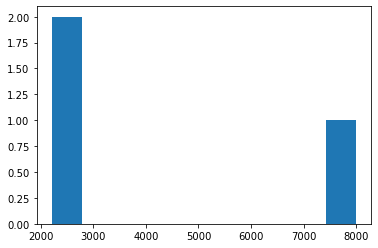

In [7]:
plt.hist(dup.loc[dup['Income']>2000].Income)

In [8]:
# train = train.drop(index=dup.index)

In [9]:
test = pd.read_csv('data/test.csv')
sum(test.iloc[:, 1:].duplicated())

680

In [10]:
train.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


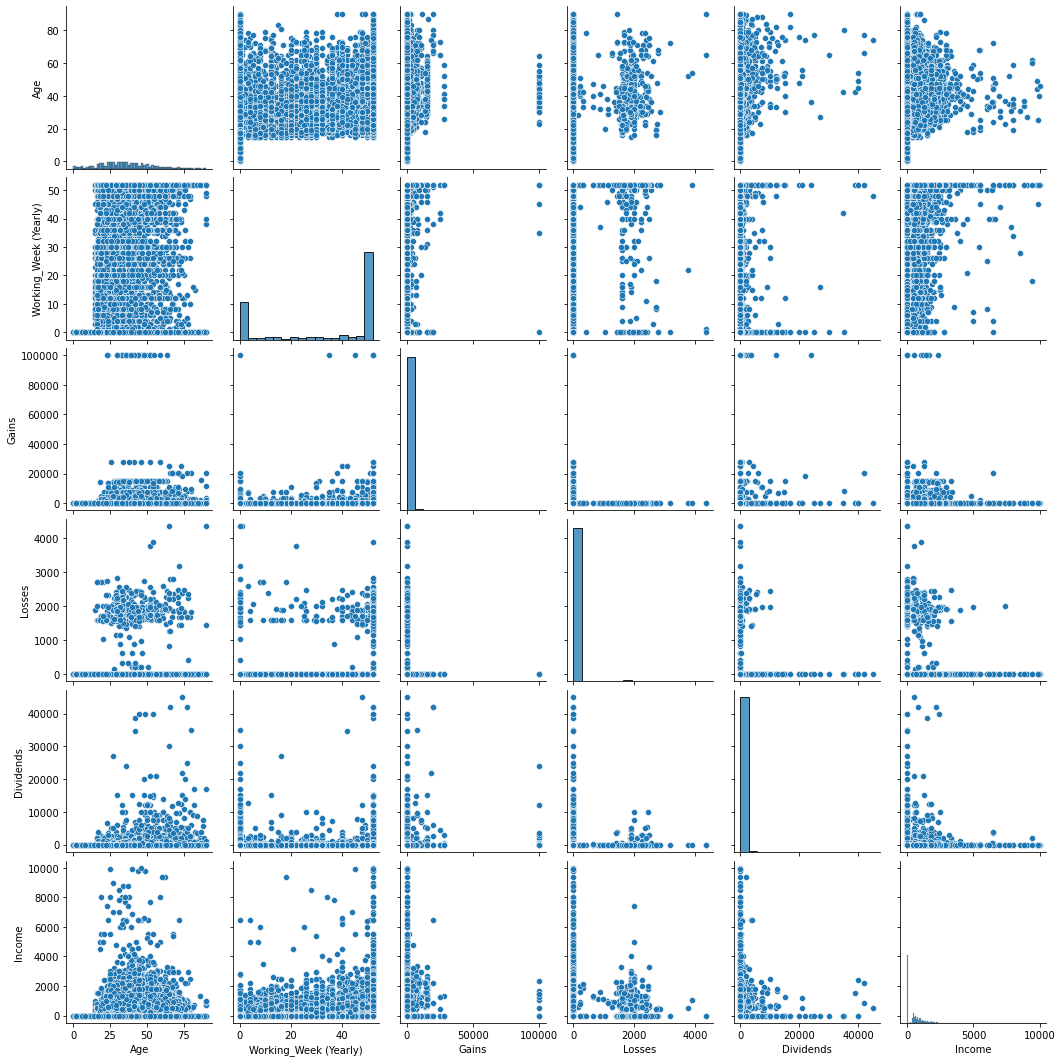

In [11]:
sns.pairplot(train)
plt.show()

### correlation

In [12]:
# corr = train.corr()
# sns.heatmap(corr, annot=True)

In [13]:
cat_cols = list(train.dtypes[train.dtypes == "object"].index)
cat_cols

['ID',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Income_Status']

### target 분포 확인

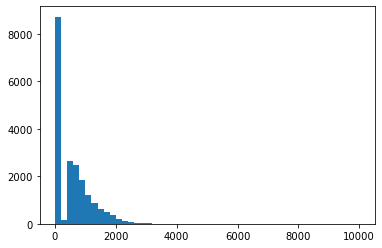

In [14]:
plt.hist(train['Income'], bins=50)
plt.show()

#### 0이 대부분

#### 0값 제거한 분포 확인

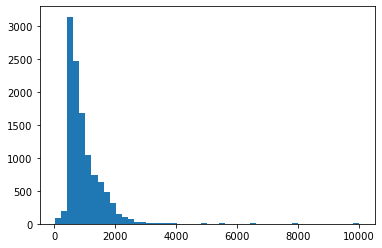

In [15]:
df = train.loc[train['Income']>0]
plt.hist(df['Income'], bins=50)
plt.show()

In [16]:
train.loc[train['Income']>0].describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,36.648500,45.100504,299.215341,43.156773,94.834911,981.270902
std,13.054764,13.602901,2986.794334,285.872584,1072.039666,672.429063
min,15.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,26.000000,46.000000,0.000000,0.000000,0.000000,585.000000
50%,35.000000,52.000000,0.000000,0.000000,0.000000,800.000000
75%,46.000000,52.000000,0.000000,0.000000,0.000000,1200.000000
max,90.000000,52.000000,99999.000000,3900.000000,45000.000000,9999.000000


#### 2000 이상 확인

491


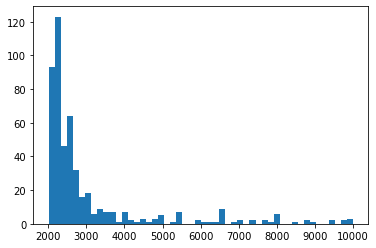

In [17]:
df = train.loc[train['Income']>2000]
print(len(df))
plt.hist(df['Income'], bins=50)
plt.show()

In [18]:
df = train.loc[train['Income']>2000]

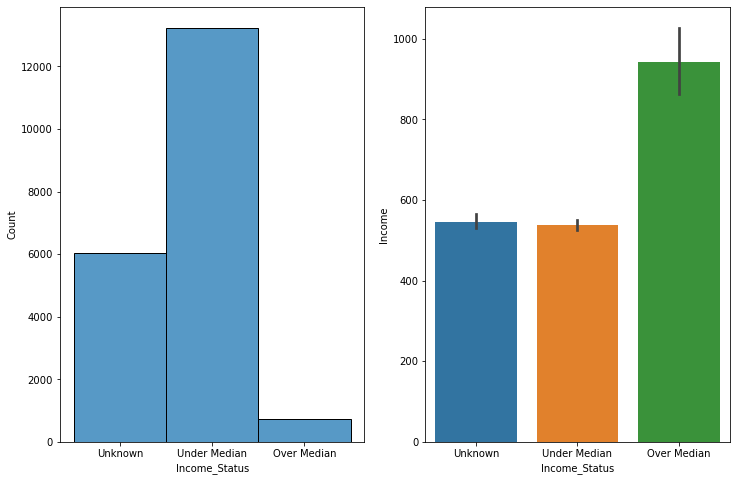

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x='Income_Status')

plt.subplot(1, 2, 2)
sns.barplot(data=train, x='Income_Status', y='Income')

plt.show()

In [20]:
unknown = train.loc[train['Income_Status']=='Unknown']
under = train.loc[train['Income_Status']=='Under Median']
over = train.loc[train['Income_Status']=='Over Median']

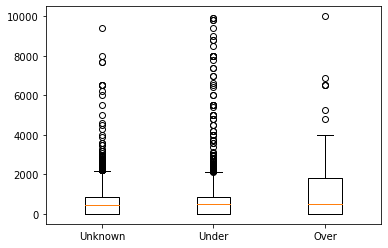

In [21]:
plt.boxplot([unknown['Income'], under['Income'], over['Income']])
plt.xticks([1, 2, 3], ['Unknown', 'Under', 'Over'])
plt.show()

In [22]:
under = train.loc[train['Income_Status']!='Over Median']
over = train.loc[train['Income_Status']=='Over Median']

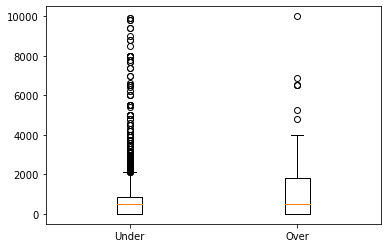

In [23]:
plt.boxplot([under['Income'], over['Income']])
plt.xticks([1, 2], ['Under', 'Over'])
plt.show()

In [24]:
sum(train['Income']==0), sum(train['Income']>0)

(8697, 11303)

### 결측치 제거 전
#### income = 0 : 8697, income > 0 : 11303
#### 즉 대략 반반 정도의 비율

### 결측치는 대부분 0이 지워짐

### Age

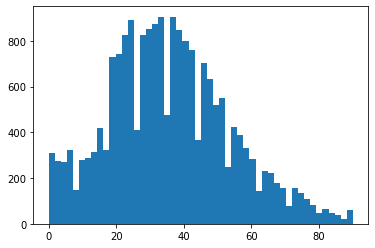

In [25]:
plt.hist(train['Age'], bins=50)
plt.show()

### Working Week

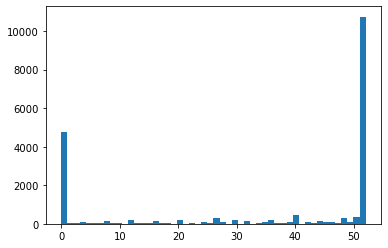

In [26]:
plt.hist(train['Working_Week (Yearly)'], bins=50)
plt.show()

In [27]:
np.unique(train['Working_Week (Yearly)'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

#### 0 또는 52가 대부분

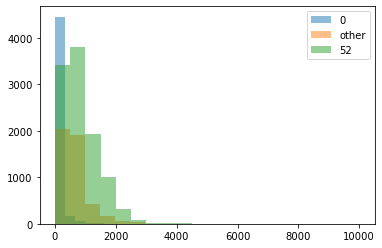

In [28]:
income_0 = train.loc[train['Working_Week (Yearly)']==0].Income
income_52 = train.loc[train['Working_Week (Yearly)']==52].Income
income_other = train.loc[(train['Working_Week (Yearly)']>0)&(train['Working_Week (Yearly)']<52)].Income
plt.hist(income_0, alpha=0.5, bins=20, label=0)
plt.hist(income_other, alpha=0.5, bins=20, label='other')
plt.hist(income_52, alpha=0.5, bins=20, label=52)
plt.legend()
plt.show()

### Gains, Losses, Dividend

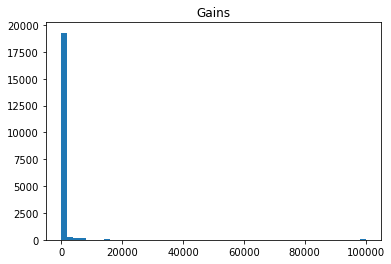

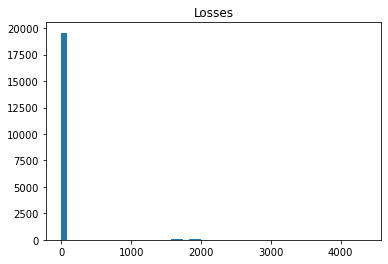

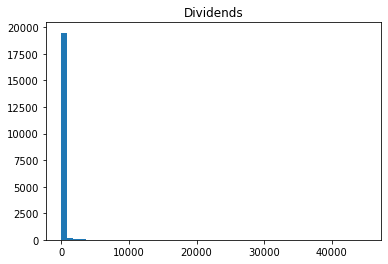

In [29]:
cols = ['Gains', 'Losses', 'Dividends']

for c in cols:
    plt.title(c)
    plt.hist(train[c], bins=50)
    plt.show()

#### 대부분 0에 치우친 값, 다른 처리 필요

### 카테고리 컬럼 확인

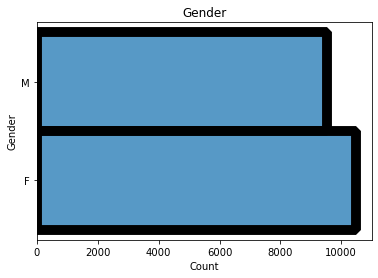

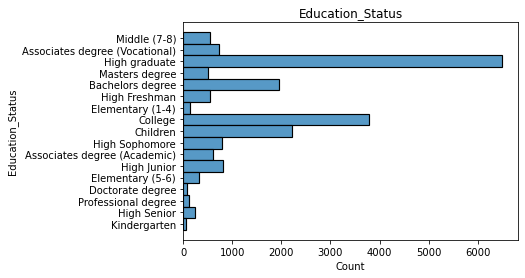

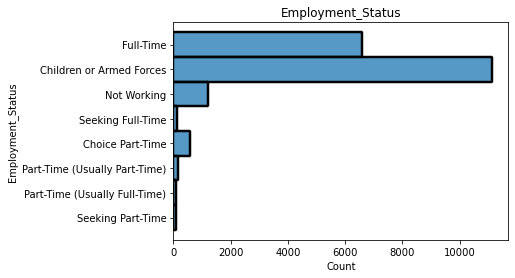

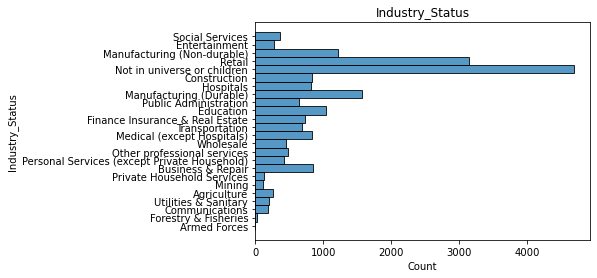

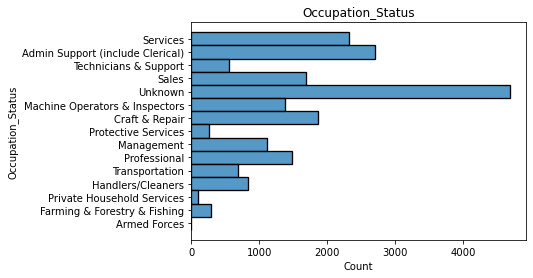

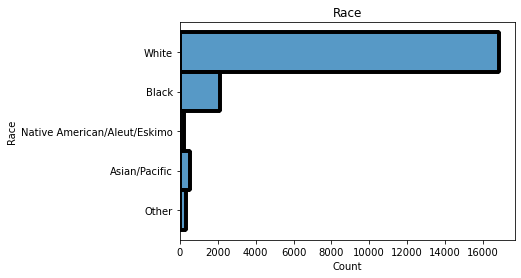

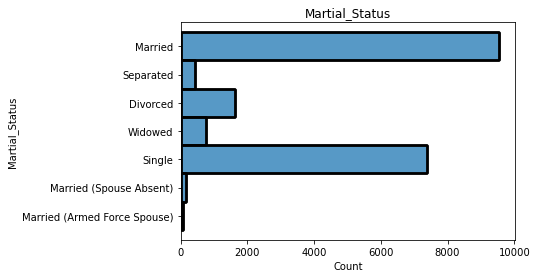

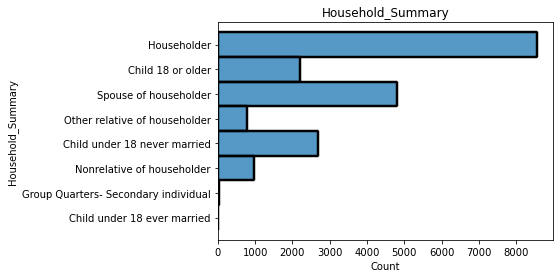

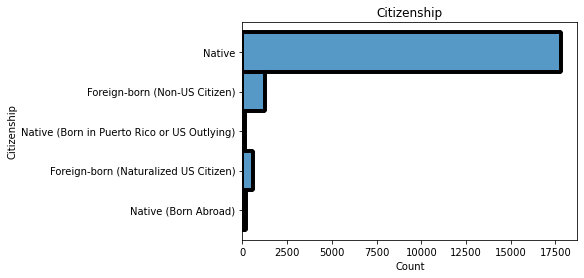

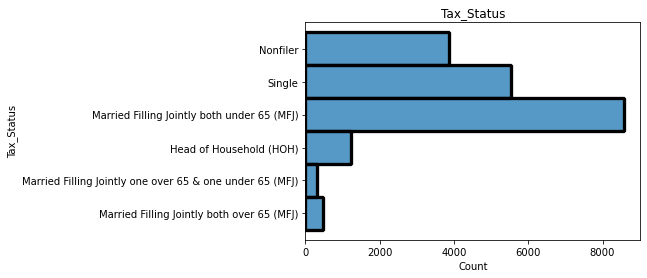

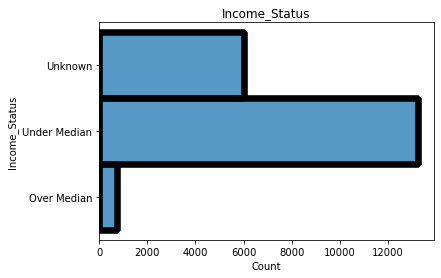

In [30]:
for c in cat_cols[1:]:
    if c in ['Hispanic_Origin', 'Household_Status', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)']:
        continue
    plt.title(c)
    sns.histplot(y=train[c])
    plt.show()

### employment status : children or armed forces

### industry status : Not in universe or children

### occupation status : unknown

### Income_Status : unknown

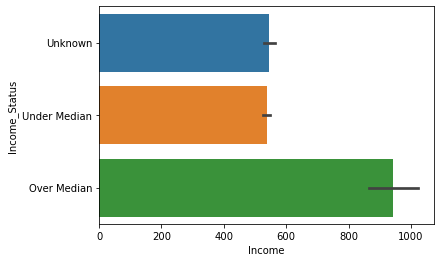

In [31]:
sns.barplot(y='Income_Status', x='Income', data=train, orient='h')
plt.show()

### income > 1000과의 분포 차이 확인

In [32]:
train['over'] = train['Income'] > 875

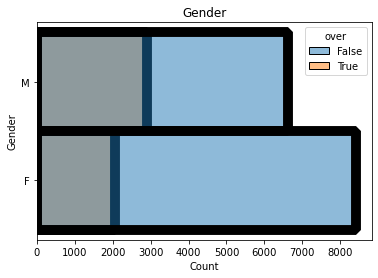

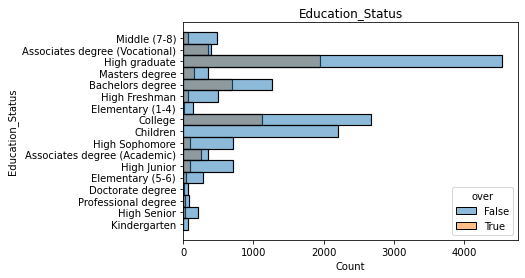

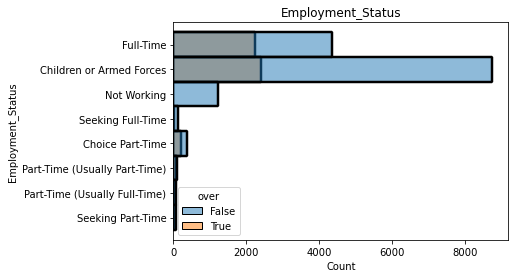

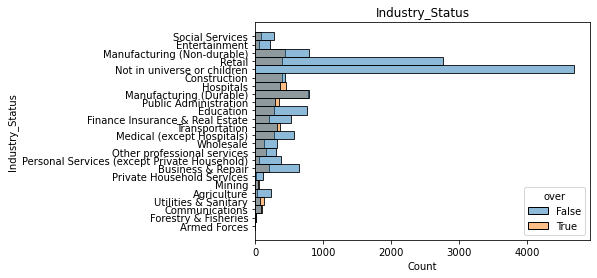

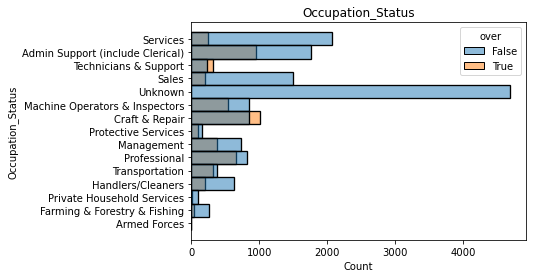

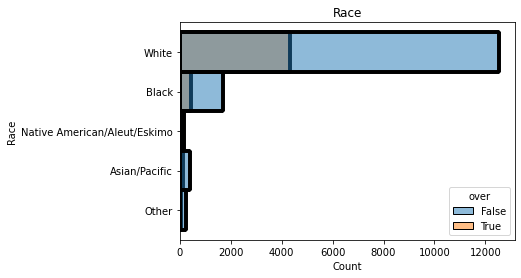

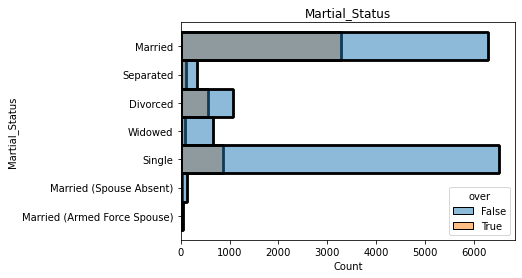

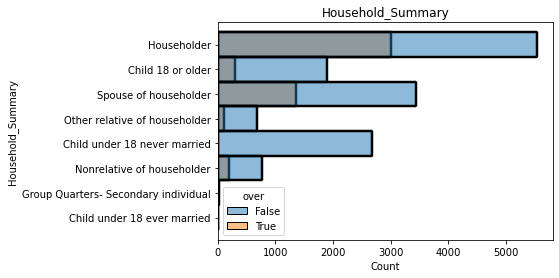

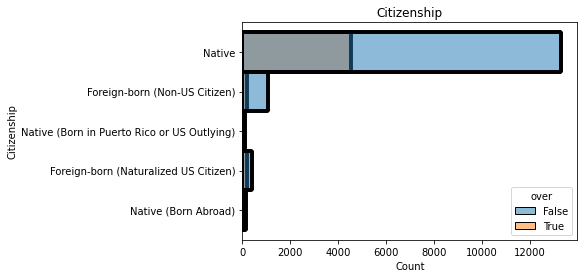

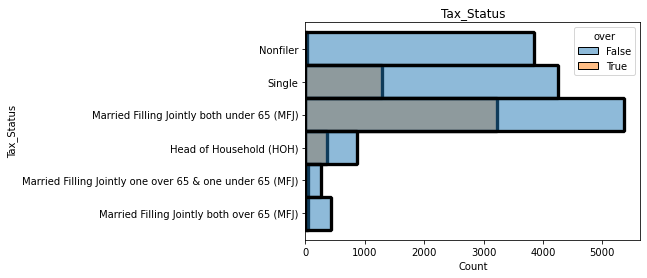

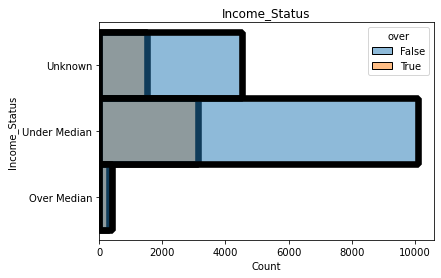

In [33]:
for c in cat_cols[1:]:
    if c in ['Hispanic_Origin', 'Household_Status', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)']:
        continue
    plt.title(c)
    sns.histplot(y=c, data=train, hue='over')
    plt.show()